**Image Zoning**

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import collections
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from IPython.display import Image
from sklearn.datasets import fetch_openml

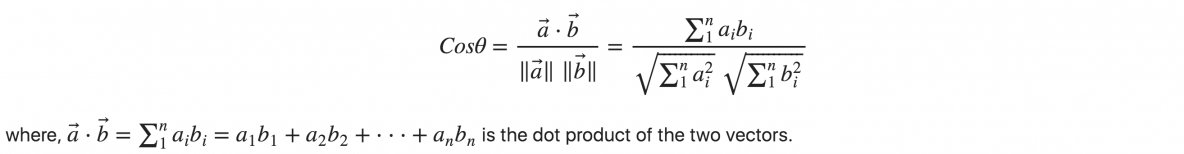

In [2]:
def cos_similarity(v1,v2):
    return np.dot(v1,v2)/np.dot(np.linalg.norm(v1),np.linalg.norm(v2))

Image(filename='Cosine-Similarity-Formula-1.png')

In [ ]:
digits = load_digits()
#print([i for i in range(len(digits["target"])) if digits["target"][i]==1])
mnist = fetch_openml('mnist_784')
mnist_array = np.array(mnist.data)
mnist_array = mnist_array.reshape((70000, 28, 28))

In [ ]:
plt.imshow(mnist_array[69998,:,:], cmap='gray')


In [ ]:
def light_zone_Vector(array):
    vec=[]
    cnt=0
    cnt1=0
    extra=0
    for i in range(0,7):
        cnt=0
        cnt1=0
        for row in range(0+extra,4+extra):
            for col in range(0,14):
                if array[row][col]>110:
                    cnt+=1
            for col in range(14,28):
                if array[row][col]>110:
                    cnt1+=1
        vec.append(cnt)
        vec.append(cnt1)
        extra+=4

    return np.array(vec)

In [ ]:


v1=light_zone_Vector(mnist_array[0,:,:])

v2=light_zone_Vector(mnist_array[69998,:,:])

print(v1,"\n",v2)
print(cos_similarity(v1,v2))

In [ ]:
train_vectors1, test_vectors1,train_labels1, test_labels1 = train_test_split(mnist_array,list(int(i) for i in mnist.target), test_size=0.8, random_state=2)


In [ ]:
def zone_vectors_for_classification(traning_set,training_class_labels):
    light={}
    cnt=collections.Counter(training_class_labels)
    
    for i in range(len(traning_set)):
        if training_class_labels[i] not in light:
            light[training_class_labels[i]]=light_zone_Vector(traning_set[i])
        else:
            light[training_class_labels[i]]+=light_zone_Vector(traning_set[i])
            
    for key in light:
        light[key]=light[key]/cnt[key]
    return light
def predict(lightzone_vec_classifer,image):
    max1=-1
    classification=-10000
    light_image_vec=light_zone_Vector(image)
    for key in lightzone_vec_classifer:
        if cos_similarity(light_image_vec,lightzone_vec_classifer[key])>max1:
            max1=cos_similarity(light_image_vec,lightzone_vec_classifer[key])
            classification=key
    return classification
    

In [ ]:
light_zone_vecs_classifiers1=zone_vectors_for_classification(train_vectors1,train_labels1)

In [ ]:
predict_vectors1 = test_vectors1
true_labels1 = test_labels1

pred_labels1 = [predict(light_zone_vecs_classifiers1,image) for image in test_vectors1]

print(classification_report(true_labels1, pred_labels1))
print(confusion_matrix(true_labels1, pred_labels1, labels=range(10)))